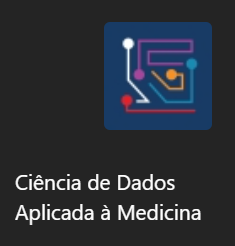

# 🖥️ Processamento de Dados: Vantagens da utilização de Linguagens de Programação

___

Autor: Nuno S. Osório
(email: nosorio@med.uminho.pt; linkedin: https://www.linkedin.com/in/nunososorio/)

Data: 21 e 22 de maio 2024

Versão Interativa: https://tinyurl.com/cienciadados2
___

# Árvores de Paris



In [ ]:
from IPython.display import display, HTML

# Define the iframe code
iframe_code = """
<div class="sketchfab-embed-wrapper">
    <iframe title="T" frameborder="0" allowfullscreen mozallowfullscreen="true" webkitallowfullscreen="true" allow="autoplay; fullscreen; xr-spatial-tracking" xr-spatial-tracking execution-while-out-of-viewport execution-while-not-rendered web-share src="https://sketchfab.com/models/18b6147712854200bdbc5c5424e3c0dd/embed?ui_infos=0">
    </iframe>
</div>
"""
# Display the iframe
display(HTML(iframe_code))

# Visualization by Loïc Norgeot

In [ ]:
!wget https://raw.githubusercontent.com/nunososorio/medicaldatascience/main/les-arbres.xlsx

--2024-05-21 22:31:37--  https://raw.githubusercontent.com/nunososorio/medicaldatascience/main/les-arbres.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21435454 (20M) [application/octet-stream]
Saving to: ‘les-arbres.xlsx’

les-arbres.xlsx     100%[===================>]  20.44M   113MB/s    in 0.2s    

2024-05-21 22:31:38 (113 MB/s) - ‘les-arbres.xlsx’ saved [21435454/21435454]



In [58]:
import pandas as pd
df = pd.read_excel("les-arbres.xlsx")
df

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,202333,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,ROUTE SAINT HUBERT,202014,Sophora,Styphnolobium,japonicum,NaN,80,8,Adulte,NON,"48.827213058685736, 2.4526493999585823"
1,262615,Arbre,Alignement,PARIS 16E ARRDT,NaN,NaN,BOULEVARD DE MONTMORENCY,202013,Sophora,Styphnolobium,japonicum,NaN,126,12,Adulte,NON,"48.855290250253894, 2.2639776886541667"
2,266962,Arbre,Alignement,PARIS 17E ARRDT,NaN,NaN,BOULEVARD DE REIMS,103020,Platane,Platanus,x hispanica,NaN,206,20,Mature,NON,"48.89053027449785, 2.299673472188525"
3,286937,Arbre,Alignement,PARIS 20E ARRDT,142-144,NaN,RUE DES PYRENEES,1802004,Sophora,Styphnolobium,japonicum,NaN,55,8,Jeune (arbre)Adulte,NON,"48.8595245091764, 2.401780969021116"
4,148479,Arbre,CIMETIERE,PARIS 17E ARRDT,NaN,NaN,CIMETIERE DES BATIGNOLLES / AVENUE LATERALE / ...,A12600031006,Noisetier de Byzance,Corylus,colurna,NaN,20,5,NaN,NON,"48.89890809754974, 2.3192180573848784"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210157,194762,Arbre,PERIPHERIQUE,PARIS 14E ARRDT,NaN,NaN,TALUS N°05-01,90501001,Peuplier,Populus,nigra,''Italica'',140,15,NaN,NON,"48.82036902403632, 2.3251375106938075"
210158,104154,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT / 7 RUE BOTZARIS,O09402007,Noyer,Juglans,nigra,NaN,300,25,Mature,NON,"48.87792251378056, 2.3795524719125503"
210159,220092,Arbre,Alignement,PARIS 12E ARRDT,62,NaN,BOULEVARD DE BERCY,802021,Platane,Platanus,x hispanica,NaN,130,10,Adulte,NON,"48.83887003065285, 2.38806770694977"
210160,233692,Arbre,Alignement,PARIS 13E ARRDT,17,NaN,RUE NEUVE TOLBIAC,301008,Sophora,Styphnolobium,japonicum,NaN,60,5,Jeune (arbre)Adulte,NON,"48.83124569686037, 2.378112070887491"


In [63]:

dcounts = df.groupby('ARRONDISSEMENT').size()

In [64]:
dcounts

ARRONDISSEMENT
BOIS DE BOULOGNE      4143
BOIS DE VINCENNES    11821
HAUTS-DE-SEINE        5330
PARIS 10E ARRDT       3643
PARIS 11E ARRDT       6174
PARIS 12E ARRDT      13038
PARIS 13E ARRDT      17356
PARIS 14E ARRDT      11732
PARIS 15E ARRDT      17776
PARIS 16E ARRDT      17081
PARIS 17E ARRDT      11917
PARIS 18E ARRDT      11192
PARIS 19E ARRDT      15147
PARIS 1ER ARRDT       1646
PARIS 20E ARRDT      15759
PARIS 2E ARRDT         593
PARIS 3E ARRDT        1289
PARIS 4E ARRDT        2775
PARIS 5E ARRDT        2700
PARIS 6E ARRDT        1809
PARIS 7E ARRDT        8699
PARIS 8E ARRDT        7462
PARIS 9E ARRDT        1387
SEINE-SAINT-DENIS    12117
VAL-DE-MARNE          7576
dtype: int64

In [65]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'ARRONDISSEMENT' is the column for districts
# Step 1: Count the occurrences of each tree species
tree_counts = df['LIBELLE FRANCAIS'].value_counts()

# Step 2: Count the number of distinct districts each tree species appears in
tree_districts = df.groupby('LIBELLE FRANCAIS')['ARRONDISSEMENT'].nunique()

# Combine the data
combined_data = pd.DataFrame({
    'Tree Species': tree_counts.index,
    'Abundance': tree_counts.values,
    'Districts': tree_districts.values
})

# Sort by the number of districts and then by abundance
sorted_data = combined_data.sort_values(by=['Districts', 'Abundance'], ascending=[True, False])

# Get the most abundant tree present in the least number of districts
most_abundant_least_districts = sorted_data.iloc[0]

print(most_abundant_least_districts)

Tree Species    Platane
Abundance         42475
Districts             1
Name: 0, dtype: object


In [72]:
dfp = df[df['LIBELLE FRANCAIS'] == 'Platane']

In [73]:
dfp

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d,Latitude,Longitude
2,266962,Arbre,Alignement,PARIS 17E ARRDT,NaN,NaN,BOULEVARD DE REIMS,103020,Platane,Platanus,x hispanica,NaN,206,20,Mature,NON,"48.89053027449785, 2.299673472188525",48.890530,2.299673
8,161046,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE DE THIAIS / AVENUE CENTRALE / DIV 30,A01300030007,Platane,Platanus,orientalis,NaN,170,18,Adulte,NON,"48.76359954944208, 2.3747485731395197",48.763600,2.374749
12,265623,Arbre,Alignement,PARIS 15E ARRDT,92,NaN,AVENUE DE SUFFREN,1802003,Platane,Platanus,x hispanica,NaN,135,15,Adulte,NON,"48.850764333248854, 2.301522440152673",48.850764,2.301522
18,221838,Arbre,Alignement,PARIS 16E ARRDT,NaN,NaN,PLACE DE BARCELONE,406001,Platane,Platanus,x hispanica,NaN,180,20,Adulte,NON,"48.84750030348921, 2.273152559181151",48.847500,2.273153
21,246152,Arbre,Alignement,PARIS 14E ARRDT,83,NaN,AVENUE DENFERT ROCHEREAU,301043,Platane,Platanus,x hispanica,NaN,55,5,Jeune (arbre),NON,"48.83565714246515, 2.3337274121225673",48.835657,2.333727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210136,224394,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,BOULEVARD RICHARD LENOIR,104021,Platane,Platanus,x hispanica,NaN,120,15,Adulte,NON,"48.8549633530412, 2.37014721059449",48.854963,2.370147
210137,225282,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,AVENUE DE LA PORTE DE CHATILLON,204010,Platane,Platanus,x hispanica,NaN,50,6,Jeune (arbre),NON,"48.823836946285134, 2.3173626141977537",48.823837,2.317363
210143,271886,Arbre,Alignement,PARIS 7E ARRDT,83,NaN,AVENUE BOSQUET,1301013,Platane,Platanus,occidentalis,NaN,80,12,Adulte,NON,"48.85507039735096, 2.305404159264947",48.855070,2.305404
210156,163074,Arbre,CIMETIERE,HAUTS-DE-SEINE,NaN,NaN,CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 21,A14000021004,Platane,Platanus,x hispanica,NaN,0,0,NaN,NON,"48.80875582769985, 2.3110709056576564",48.808756,2.311071


In [78]:
# Install folium using pip
# pip install folium

import folium

# Create a map centered around the average coordinates of France
map = folium.Map(location=[46.2276, 2.2137], zoom_start=8)

# Assuming 'df' is your DataFrame with 'Latitude' and 'Longitude' columns
# Add tree locations to the map
#for idx, row in dfp.iterrows():
 #   folium.Marker(location=[row['Latitude'], row['Longitude']],
  #                popup=row['LIBELLE FRANCAIS']).add_to(map)

# Display the map
map

In [82]:
import folium

# Create a map centered around Paris
map = folium.Map(location=[48.8566, 2.3522], zoom_start=11)

# Coordinates for the center of Paris
paris_center_coords = [48.8566, 2.3522]

# Add a marker for the center of Paris
folium.Marker(paris_center_coords, popup='Centro de Paris').add_to(map)

# Display the map
map

In [74]:

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

# Assuming 'df' is your DataFrame with 'Latitude' and 'Longitude' columns
# Load your DataFrame
# df = pd.read_csv('your_file.csv')  # Uncomment and set your file path

# Create a new map plot
fig, ax = plt.subplots(figsize=(10, 20))

# Set the map boundaries and resolution
map = Basemap(resolution='i', projection='tmerc', lat_0=46.2276, lon_0=2.2137,
              llcrnrlon=-5, llcrnrlat=42, urcrnrlon=8, urcrnrlat=51)

# Draw coastlines, countries, and map boundaries
map.drawcoastlines()
map.drawcountries()
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='lightgreen', lake_color='aqua')

# Convert latitude and longitude to x and y coordinates
x, y = map(dfp['Longitude'].values, df['Latitude'].values)

# Plot the points on the map
map.scatter(x, y, marker='o', color='red', zorder=5)

plt.title('Tree Locations in France')
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
genre_count = df.groupby('GENRE')['ARRONDISSEMENT'].value_counts()
genre_count_df = genre_count.reset_index(name='COUNT')
genre_count_df

,GENRE,ARRONDISSEMENT,COUNT
0,Abelia,PARIS 7E ARRDT,1
1,Abies,BOIS DE VINCENNES,48
2,Abies,PARIS 11E ARRDT,27
3,Abies,PARIS 12E ARRDT,11
4,Abies,SEINE-SAINT-DENIS,10
...,...,...,...
2001,x Cupressocyparis,PARIS 10E ARRDT,1
2002,x Sorbopyrus,BOIS DE VINCENNES,1
2003,x Sycoparrotia,PARIS 18E ARRDT,2
2004,x Sycoparrotia,BOIS DE VINCENNES,1


In [67]:
df

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d,Latitude,Longitude
0,202333,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,ROUTE SAINT HUBERT,202014,Sophora,Styphnolobium,japonicum,NaN,80,8,Adulte,NON,"48.827213058685736, 2.4526493999585823",48.827213,2.452649
1,262615,Arbre,Alignement,PARIS 16E ARRDT,NaN,NaN,BOULEVARD DE MONTMORENCY,202013,Sophora,Styphnolobium,japonicum,NaN,126,12,Adulte,NON,"48.855290250253894, 2.2639776886541667",48.855290,2.263978
2,266962,Arbre,Alignement,PARIS 17E ARRDT,NaN,NaN,BOULEVARD DE REIMS,103020,Platane,Platanus,x hispanica,NaN,206,20,Mature,NON,"48.89053027449785, 2.299673472188525",48.890530,2.299673
3,286937,Arbre,Alignement,PARIS 20E ARRDT,142-144,NaN,RUE DES PYRENEES,1802004,Sophora,Styphnolobium,japonicum,NaN,55,8,Jeune (arbre)Adulte,NON,"48.8595245091764, 2.401780969021116",48.859525,2.401781
4,148479,Arbre,CIMETIERE,PARIS 17E ARRDT,NaN,NaN,CIMETIERE DES BATIGNOLLES / AVENUE LATERALE / ...,A12600031006,Noisetier de Byzance,Corylus,colurna,NaN,20,5,NaN,NON,"48.89890809754974, 2.3192180573848784",48.898908,2.319218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210157,194762,Arbre,PERIPHERIQUE,PARIS 14E ARRDT,NaN,NaN,TALUS N°05-01,90501001,Peuplier,Populus,nigra,''Italica'',140,15,NaN,NON,"48.82036902403632, 2.3251375106938075",48.820369,2.325138
210158,104154,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT / 7 RUE BOTZARIS,O09402007,Noyer,Juglans,nigra,NaN,300,25,Mature,NON,"48.87792251378056, 2.3795524719125503",48.877923,2.379552
210159,220092,Arbre,Alignement,PARIS 12E ARRDT,62,NaN,BOULEVARD DE BERCY,802021,Platane,Platanus,x hispanica,NaN,130,10,Adulte,NON,"48.83887003065285, 2.38806770694977",48.838870,2.388068
210160,233692,Arbre,Alignement,PARIS 13E ARRDT,17,NaN,RUE NEUVE TOLBIAC,301008,Sophora,Styphnolobium,japonicum,NaN,60,5,Jeune (arbre)Adulte,NON,"48.83124569686037, 2.378112070887491",48.831246,2.378112


In [ ]:
# Assuming genre_count_df is your DataFrame from the previous step
unique_genres_df = genre_count_df[genre_count_df['COUNT'] == 1]

print(unique_genres_df)


        ARRONDISSEMENT      GENRE  COUNT
24    BOIS DE BOULOGNE      Salix      1
25    BOIS DE BOULOGNE      Taxus      1
26    BOIS DE BOULOGNE    Robinia      1
27    BOIS DE BOULOGNE  Araucaria      1
28    BOIS DE BOULOGNE    Catalpa      1
...                ...        ...    ...
2001      VAL-DE-MARNE   Magnolia      1
2002      VAL-DE-MARNE     Ginkgo      1
2003      VAL-DE-MARNE   Viburnum      1
2004      VAL-DE-MARNE    Cotinus      1
2005      VAL-DE-MARNE      Buxus      1

[348 rows x 3 columns]


In [ ]:
# Assuming genre_count_df is your DataFrame from the previous step
no_duplicates_df = genre_count_df.drop_duplicates(subset='GENRE', keep=False)

print(no_duplicates_df)


In [ ]:
import matplotlib.pyplot as plt

# Assuming species_count_df is your DataFrame from the previous step
unique_species = species_count_df[species_count['COUNT'] == 1]

# Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(unique_species_df['ARRONDISSEMENT'], unique_species_df['GENRE'])

plt.xlabel('Arrondissement')
plt.ylabel('GENRE')
plt.title('Unique Genre in Each Arrondissement')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()


NameError: name 'species_count_df' is not defined

In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Splitting the geo_point_2d column into two columns
df[['Latitude', 'Longitude']] = df['geo_point_2d'].str.split(',', expand=True)

# Converting the new columns to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

# Selecting the numerical columns
df_numerical = df[['HAUTEUR (m)', 'CIRCONFERENCE (cm)', 'Latitude', 'Longitude']]

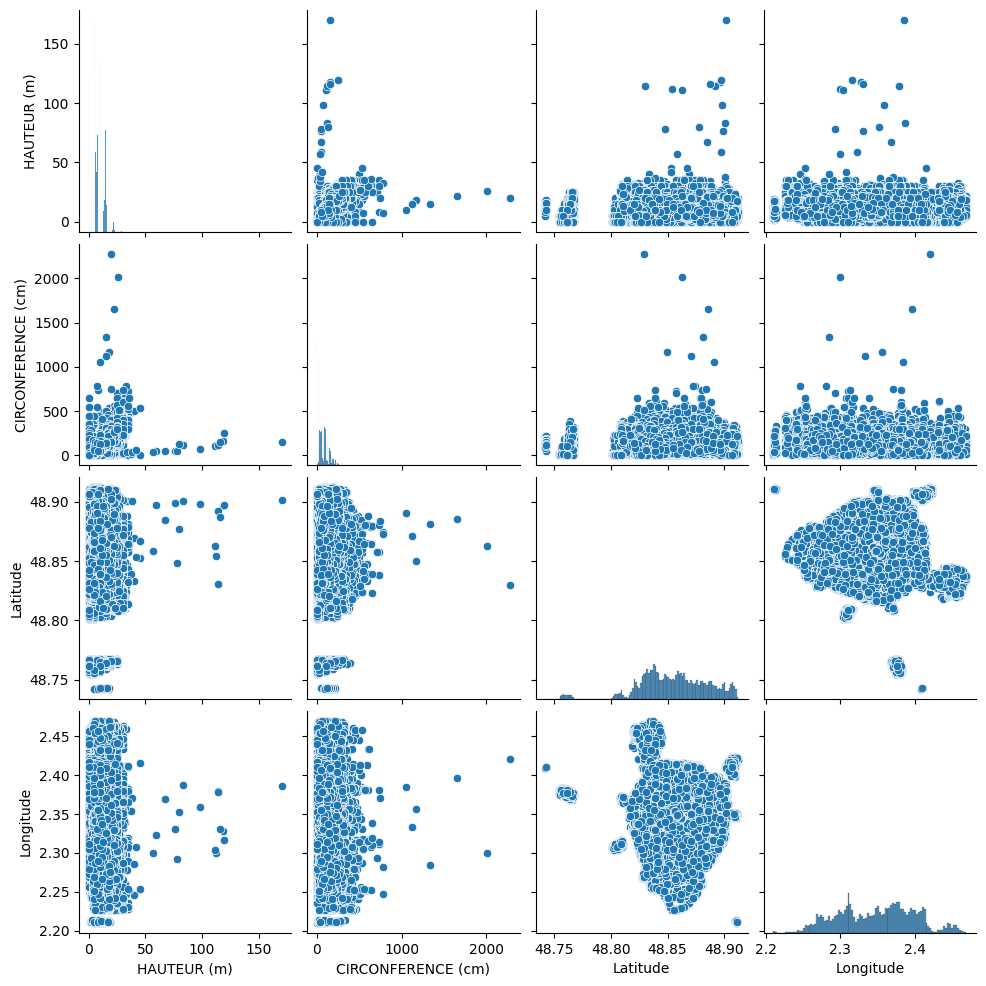

In [ ]:
import seaborn as sns

sns.pairplot(df[['HAUTEUR (m)', 'CIRCONFERENCE (cm)', 'Latitude', 'Longitude']])


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
x = StandardScaler().fit_transform(df_numerical)
x


array([[-0.13775426, -0.0106869 , -0.92391556,  2.05578385],
       [ 0.53293671,  0.71620303,  0.00425084, -1.66422122],
       [ 1.87431866,  1.98035943,  1.16920376, -0.96041408],
       ...,
       [ 0.19759123,  0.77941085, -0.53856328,  0.78243862],
       [-0.64077249, -0.32672599, -0.79060596,  0.58614519],
       [-0.13775426, -0.42153772,  0.73961299,  0.1318025 ]])

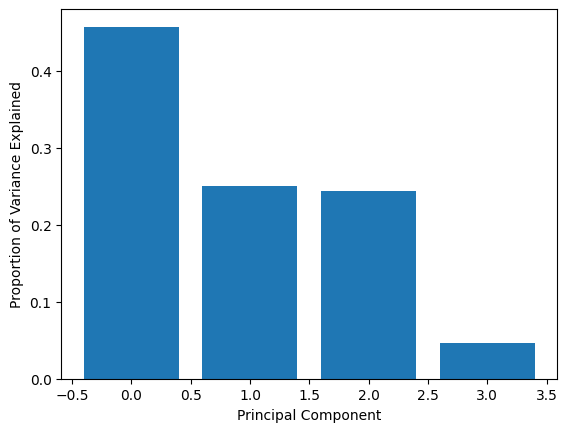

In [ ]:
import matplotlib.pyplot as plt
pca = PCA()
principalComponents = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
# Cria um DataFrame com os resultados do PCA
df_pca = pd.DataFrame(data = principalComponents, columns = ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4'])

In [ ]:
df_pca

,PCA 1,PCA 2,PCA 3,PCA 4
0,-0.390987,1.041057,1.964438,0.057200
1,1.017850,-1.308131,-0.893303,0.146297
2,2.917616,-0.044332,-1.095774,0.095678
3,-0.453799,0.917509,0.475036,-0.198531
4,-0.897574,0.451476,-1.643876,-0.200374
...,...,...,...,...
210157,1.283712,-1.080689,0.814085,-0.079965
210158,4.357043,0.924200,0.442158,0.529480
210159,0.551513,0.276581,1.005691,0.395861
210160,-0.821286,-0.026017,0.876239,0.207320


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


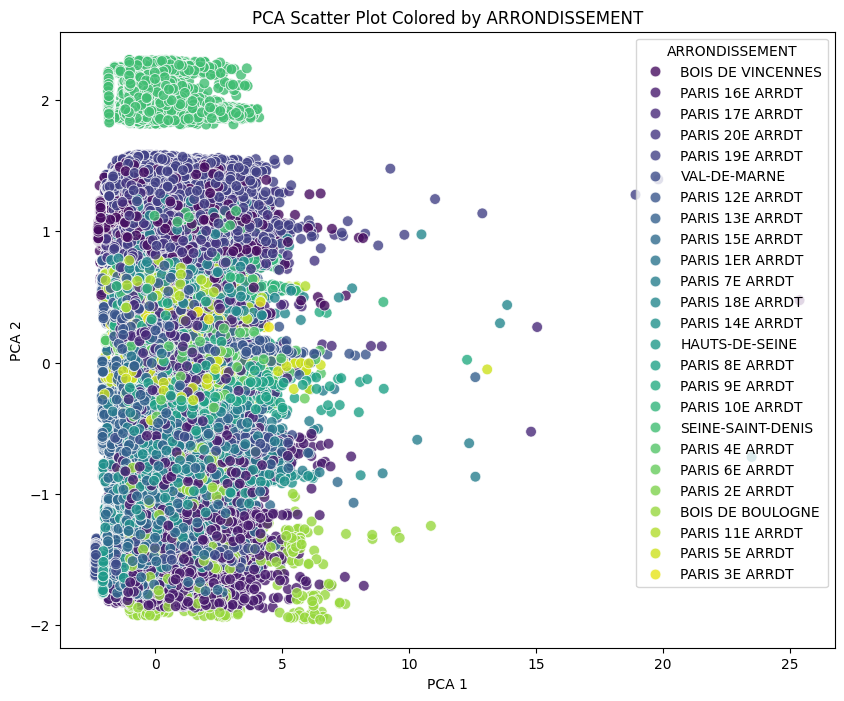

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


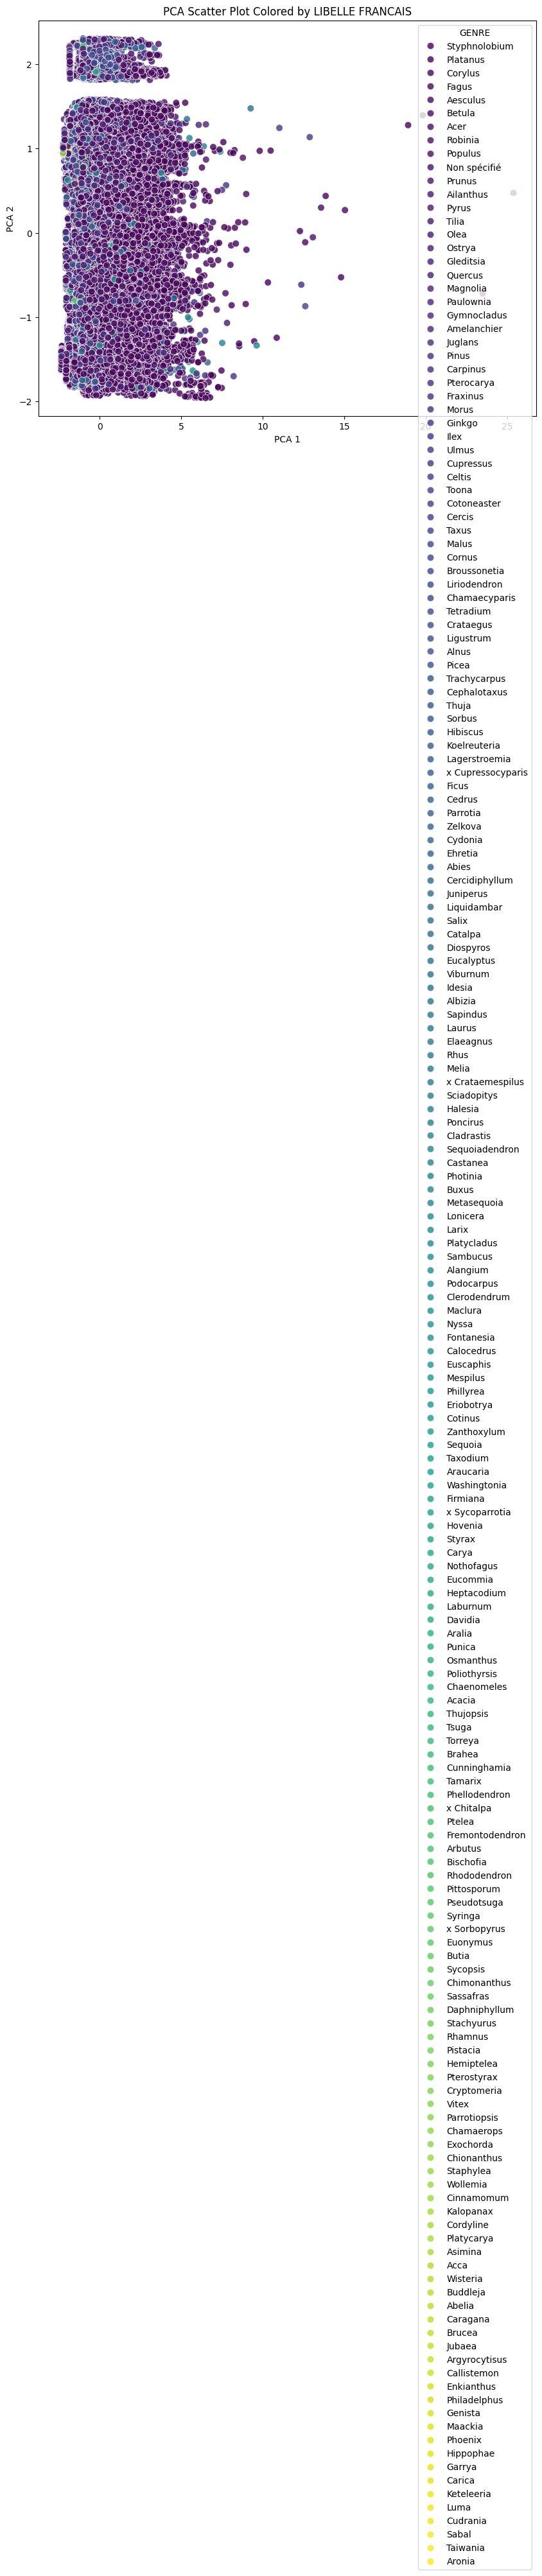

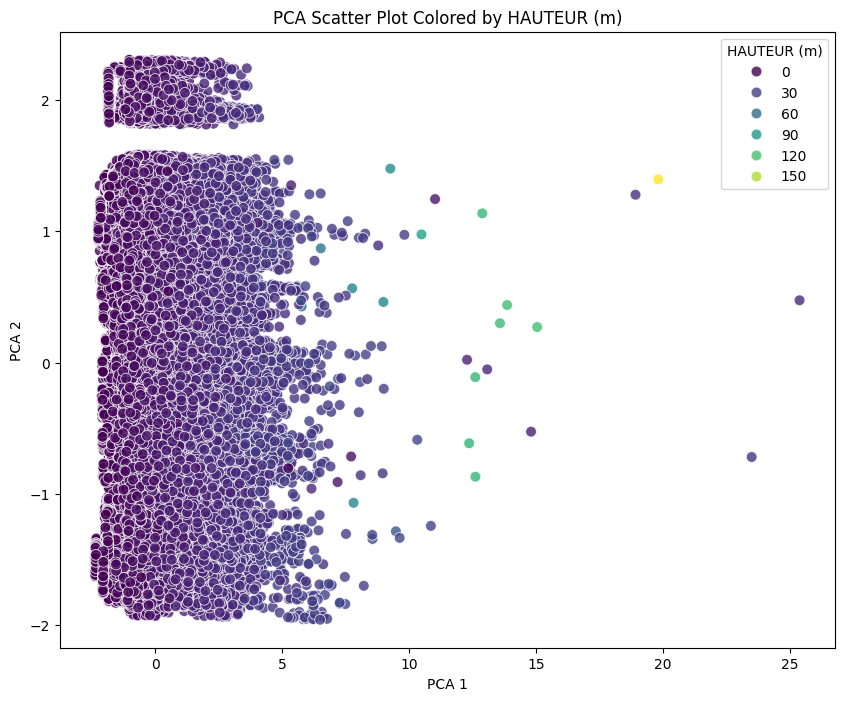

In [ ]:
# Adding 'ARRONDISSEMENT' and 'LIBELLE FRANCAIS' from the original DataFrame to df_pca
df_pca = pd.concat([df_pca, df[['ARRONDISSEMENT', 'GENRE', 'HAUTEUR (m)' ]]], axis=1)

# Creating scatter plots
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot colored by 'ARRONDISSEMENT'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA 1', y='PCA 2', hue='ARRONDISSEMENT', data=df_pca, palette='viridis', s=60, alpha=0.8)
plt.title('PCA Scatter Plot Colored by ARRONDISSEMENT')
plt.show()

# Scatter plot colored by 'GENRE'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA 1', y='PCA 2', hue='GENRE', data=df_pca, palette='viridis', s=60, alpha=0.8)
plt.title('PCA Scatter Plot Colored by LIBELLE FRANCAIS')
plt.show()

# Scatter plot colored by 'HAUTER (m)'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA 1', y='PCA 2', hue='HAUTEUR (m)', data=df_pca, palette='viridis', s=60, alpha=0.8)
plt.title('PCA Scatter Plot Colored by HAUTEUR (m)')
plt.show()

© Nuno S. Osório, 2024
